In [12]:
# !python -m pip install mlagents==0.28.0
# !python -m pip install gym
# !cd "/Users/aditya/Documents/GitHub/game_creation_research/ml-agents/gym-unity" && pip3 install -e .

import random
import joblib
from PlaceAndShootGym import *
from GAME_1_SOLVER import *
from GAME_2_SOLVER import *
from GAME_3_SOLVER import *
from GAME_4_SOLVER import *
from GAME_5_SOLVER import *
from GAME_NULL_SOLVER import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [13]:
GAME_1_ENV_PATH = "results/GAME_1/GAME_1_SOLVED.joblib"
GAME_2_ENV_PATH = "results/GAME_2/GAME_2_SOLVED.joblib"
GAME_3_ENV_PATH = "results/GAME_3/GAME_3_SOLVED.joblib"
GAME_4_ENV_PATH = "results/GAME_4/GAME_4_SOLVED.joblib"
GAME_5_ENV_PATH = "results/GAME_5/GAME_5_SOLVED.joblib"
# GAME_NULL_ENV_PATH = "results/GAME_NULL_SOLVED.joblib"

GAME_1_ENV = joblib.load(GAME_1_ENV_PATH)
GAME_2_ENV = joblib.load(GAME_2_ENV_PATH)
GAME_3_ENV = joblib.load(GAME_3_ENV_PATH)
GAME_4_ENV = joblib.load(GAME_4_ENV_PATH)
GAME_5_ENV = joblib.load(GAME_5_ENV_PATH)
# GAME_NULL_ENV = joblib.load(GAME_NULL_ENV_PATH)


In [3]:
# settings_from_actual_run = {"setup": [[0, 0, -0.249, 0.522, 'gear', False],
#                                       [0, 0, 0.246, 0.799, 'gear', False],
#                                       [0, 0, -0.563, -0.091, 'corner', False],
#                                       [0, 0, 0, 0, None, True]],
#                             "x_range":  (-0.5, -0.3),
#                             "y_range":  (0.12, 0.32),
#                             "required_percent_of_shots_in_chosen_zone":  0.23}


In [4]:
# GAME_NULL_REWARD.__setattr__("x_limit", settings_from_actual_run["x_range"][0])
# GAME_NULL_REWARD.__setattr__("y_limit", settings_from_actual_run["y_range"][0])
# GAME_NULL_REWARD.__setattr__("setup_array", settings_from_actual_run["setup"])


In [14]:
playabilities = {}

playabilities["GAME_1"] = len(GAME_1_ENV.winning_shots)/GAME_1_ENV.num_tries
print("Playability GAME_1: ", round(playabilities["GAME_1"], 4))

playabilities["GAME_2"] = len(GAME_2_ENV.winning_shots)/GAME_2_ENV.num_tries
print("Playability GAME_2: ", round(playabilities["GAME_2"], 4))

playabilities["GAME_3"] = len(GAME_3_ENV.winning_shots)/GAME_3_ENV.num_tries
print("Playability GAME_3: ", round(playabilities["GAME_3"], 4))

playabilities["GAME_4"] = len(GAME_4_ENV.winning_shots)/GAME_4_ENV.num_tries
print("Playability GAME_4: ", round(playabilities["GAME_4"], 4))

playabilities["GAME_5"] = len(GAME_5_ENV.winning_shots)/GAME_5_ENV.num_tries
print("Playability GAME_5: ", round(playabilities["GAME_5"], 4))


Playability GAME_1:  0.1892
Playability GAME_2:  0.0425
Playability GAME_3:  0.0066
Playability GAME_4:  0.564
Playability GAME_5:  0.0321


In [6]:
def replayWinningShots(winning_shots, quiet=False):
    for shot in winning_shots:
        # reset
        env.step([0, 0, 0, 0, 0, 1], quiet=True)
        # place
        place = Action(shot["place_action"])
        place.transformed = True
        env.step(place, quiet=quiet)
        # shoot
        shoot = Action(shot["shoot_action"])
        shoot.transformed = True
        env.step(shoot, quiet=quiet)
        print(f"Reward: {shot['reward']}")


In [7]:
try:
    env.close()
except:
    pass

SERVER_BUILD = "../Builds/MLAgent_View_21April22_server.app"
GYM_BUILD = "../Builds/Gym_View_12May22.app"

channel = EngineConfigurationChannel()
channel.set_configuration_parameters(time_scale=1, quality_level=0)
unity_env = UnityEnvironment(
    file_name=GYM_BUILD, seed=1, side_channels=[channel], worker_id=2)

# unity_env = UnityEnvironment()

unity_env.reset()
gym_env = UnityToGymWrapper(unity_env, allow_multiple_obs=False)
env = GAME_3_ENV
env.gym_env = gym_env


E0512 16:56:20.466296000 4727823872 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[INFO] Connected to Unity environment with package version 2.2.1-exp.1 and communication version 1.5.0
[INFO] Connected new brain: PlaceAndShoot?team=0
[WARNING] The environment contains multiple observations. You must define allow_multiple_obs=True to receive them all. Otherwise, only the first visual observation (or vector observation ifthere are no visual observations) will be provided in the observation.


/opt/anaconda3/envs/introml_conda/lib/python3.8/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [8]:
env.setup(GAME_3_ENV.setup_array)


array([ 6.75     ,  1.       ,  4.3199997,  2.7      ,  3.6000001,
        2.5874999,  6.75     , -0.65     ,  6.75     , -2.       ,
        0.       , -3.9      ,  0.       , -0.       , -1.       ,
        1.       ], dtype=float32)

In [9]:
GAME_1_ENV.winning_shots[0]


{'place_action': (0, 0, 0, 0, 0, 0),
 'shoot_action': (-0.5999999999999996, -1.0, 0, 0, 0, 0),
 'reward': 1.0}

In [10]:
shots_to_play = random.sample(GAME_3_ENV.winning_shots, 50)
# shots_to_play = GAME_3_ENV.winning_shots
replayWinningShots(shots_to_play, quiet=False)


Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0


KeyboardInterrupt: 

In [ ]:
rewards = [shot["reward"] for shot in GAME_NULL_ENV.winning_shots]


In [ ]:
plt.hist(rewards)


In [11]:
env.close()


In [15]:
setup_data = pd.read_csv(
    "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/human_data/setup_difficulty_scores.csv")
play_data = pd.read_csv(
    "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/human_data/play_difficulty_scores.csv")


In [16]:
setup_data

,id,name,game_num,difficulty
0,1,Ingrid,GAME_1,6
1,1,Ingrid,GAME_2,7
2,1,Ingrid,GAME_3,7
3,1,Ingrid,GAME_4,6
4,1,Ingrid,GAME_5,9
5,2,Chhavi,GAME_1,6
6,2,Chhavi,GAME_2,7
7,2,Chhavi,GAME_3,4
8,2,Chhavi,GAME_4,4
9,2,Chhavi,GAME_5,8


In [17]:
play_data

,id,name,game_num,difficulty
0,1,Ingrid,GAME_1,8
1,1,Ingrid,GAME_2,8
2,1,Ingrid,GAME_3,7
3,1,Ingrid,GAME_4,2
4,1,Ingrid,GAME_5,7
5,2,Chhavi,GAME_1,7
6,2,Chhavi,GAME_2,3
7,2,Chhavi,GAME_3,1
8,2,Chhavi,GAME_4,9
9,2,Chhavi,GAME_5,6


In [18]:
participants = list(setup_data["name"].unique())
participants


['Ingrid',
 'Chhavi',
 'Nav',
 'Adi',
 'Buz',
 'Kieran',
 'josh',
 'Eli',
 'Curi',
 'Tamas']

In [19]:
scaler = MinMaxScaler()

scaled_data = []
for each_participant in participants:
    scaled_data.append(scaler.fit_transform(np.array(
        setup_data[setup_data["name"] == each_participant]["difficulty"]).reshape(-1, 1)))
setup_data["normed_difficulty"] = np.concatenate(scaled_data)

scaled_data = []
for each_participant in participants:
    scaled_data.append(scaler.fit_transform(np.array(
        play_data[play_data["name"] == each_participant]["difficulty"]).reshape(-1, 1)))
play_data["normed_difficulty"] = np.concatenate(scaled_data)


In [63]:
setup_data["listed"] = setup_data["normed_difficulty"]
play_data["listed"] = play_data["normed_difficulty"]
agg_setup = setup_data.groupby("game_num").agg({"normed_difficulty": np.mean, "listed":list, "name":list})
agg_play = play_data.groupby("game_num").agg({"normed_difficulty": np.mean, "listed":list, "name":list})


In [64]:
diff_df = pd.DataFrame()
diff_df["agg_setup"] = agg_setup["normed_difficulty"]
diff_df["agg_play"] = agg_play["normed_difficulty"]
diff_df["setup_list"] = agg_setup["listed"]
diff_df["play_list"] = agg_play["listed"]
diff_df["name"] = agg_play["name"]
for each_game in playabilities:
    diff_df.loc[each_game, "playability"] = playabilities[each_game]
diff_df.fillna(0, inplace=True)
diff_df


,agg_setup,agg_play,setup_list,play_list,name,playability
game_num,,,,,,
GAME_1,0.153333,0.445000,"[0.0, 0.5, 0.0, 0.33333333333333326, 0.0, 0.0,...","[1.0, 0.75, 0.0, 0.75, 0.0, 0.0, 0.0, 0.199999...","[Ingrid, Chhavi, Nav, Adi, Buz, Kieran, josh, ...",0.189167
GAME_2,0.626429,0.630000,"[0.33333333333333304, 0.75, 0.1999999999999999...","[1.0, 0.25, 0.8333333333333333, 1.0, 1.0, 0.33...","[Ingrid, Chhavi, Nav, Adi, Buz, Kieran, josh, ...",0.042546
GAME_3,0.519524,0.466667,"[0.33333333333333304, 0.0, 0.19999999999999996...","[0.8333333333333333, 0.0, 0.8333333333333333, ...","[Ingrid, Chhavi, Nav, Adi, Buz, Kieran, josh, ...",0.006641
GAME_4,0.203571,0.676667,"[0.0, 0.0, 1.0, 0.0, 0.25, 0.0, 0.5, 0.2857142...","[0.0, 1.0, 1.0, 0.0, 0.5, 1.0, 1.0, 0.60000000...","[Ingrid, Chhavi, Nav, Adi, Buz, Kieran, josh, ...",0.564000
GAME_5,0.820000,0.612500,"[1.0, 1.0, 0.19999999999999996, 0.833333333333...","[0.8333333333333333, 0.625, 1.0, 0.5, 0.75, 0....","[Ingrid, Chhavi, Nav, Adi, Buz, Kieran, josh, ...",0.032060


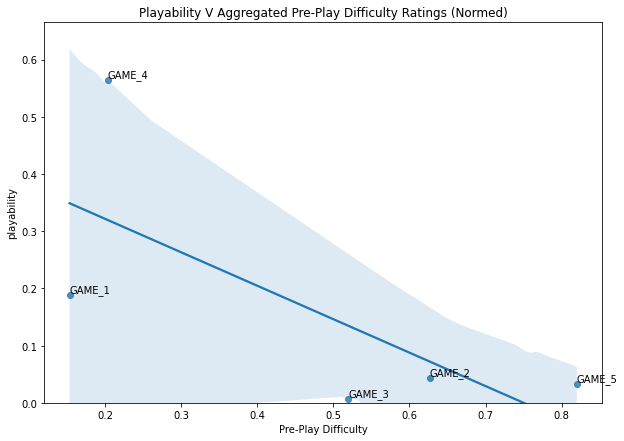

In [65]:
plt.figure(figsize=(10, 7))
sns.regplot(x="agg_setup", y="playability", data=diff_df)
plt.title("Playability V Aggregated Pre-Play Difficulty Ratings (Normed)")
plt.xlabel("Pre-Play Difficulty")
plt.ylim(bottom = 0)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['agg_setup'], point['playability'] + 0.005, str(i))
plt.show()


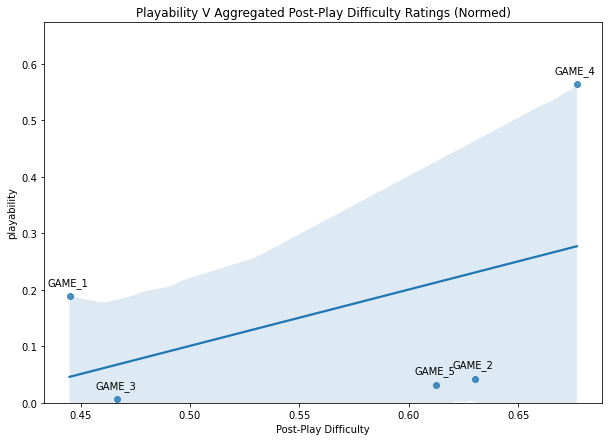

In [74]:
plt.figure(figsize=(10, 7))
sns.regplot(x="agg_play", y="playability", data=diff_df)
plt.title("Playability V Aggregated Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Post-Play Difficulty")
plt.ylim(bottom = 0)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point["agg_play"] - 0.01, point['playability'] + 0.02, str(i))
plt.show()


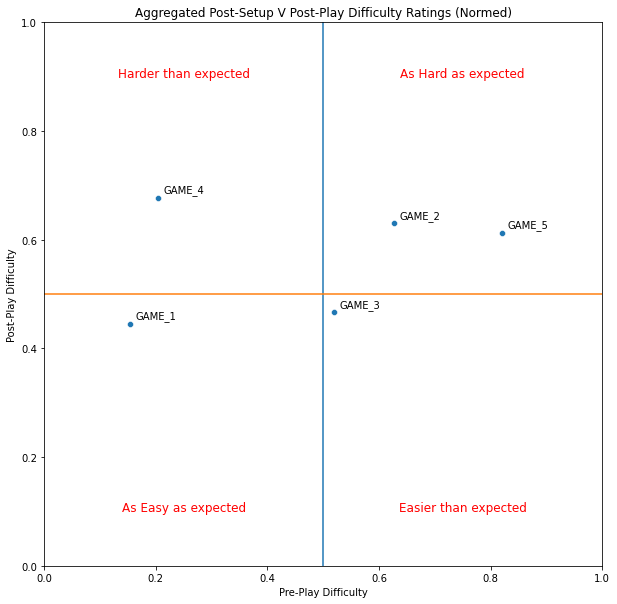

In [86]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="agg_setup", y="agg_play", data=diff_df)
plt.xlim(0, 1)
plt.ylim(0, 1)
line1_start, line1_end = [0.5, 0.5], [0, 1]
line2_start, line2_end = [0, 1], [0.5, 0.5]
plt.plot(line1_start, line1_end, line2_start, line2_end)
plt.annotate("Harder than expected", xy = (0.25, 0.9), horizontalalignment = "center", fontsize = "large", color="red")
plt.annotate("As Hard as expected", xy = (0.75, 0.9), horizontalalignment = "center", fontsize = "large", color="red")
plt.annotate("As Easy as expected", xy = (0.25, 0.1), horizontalalignment = "center", fontsize = "large", color="red")
plt.annotate("Easier than expected", xy = (0.75, 0.1), horizontalalignment = "center", fontsize = "large", color="red")
plt.title("Aggregated Post-Setup V Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Pre-Play Difficulty")
plt.ylabel("Post-Play Difficulty")
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['agg_setup'] + 0.01, point['agg_play'] + 0.01, str(i))
plt.savefig(fname="../saved_media_important/PrePlayVPostPlay.png",
            facecolor=f"white", edgecolor='none', dpi=300, bbox_inches='tight')
plt.show()


In [68]:
exploded_df = diff_df.explode(["setup_list", "play_list", "name"])
exploded_df["setup_list"] = exploded_df["setup_list"].astype(float)
exploded_df["play_list"] = exploded_df["play_list"].astype(float)
exploded_df = exploded_df[exploded_df["playability"]!=0]

# TRYING
# exploded_df = exploded_df[exploded_df["name"]!="Nav"]

exploded_df

,agg_setup,agg_play,setup_list,play_list,name,playability
game_num,,,,,,
GAME_1,0.153333,0.445000,0.000000,1.000000,Ingrid,0.189167
GAME_1,0.153333,0.445000,0.500000,0.750000,Chhavi,0.189167
GAME_1,0.153333,0.445000,0.000000,0.000000,Nav,0.189167
GAME_1,0.153333,0.445000,0.333333,0.750000,Adi,0.189167
GAME_1,0.153333,0.445000,0.000000,0.000000,Buz,0.189167
GAME_1,0.153333,0.445000,0.000000,0.000000,Kieran,0.189167
GAME_1,0.153333,0.445000,0.000000,0.000000,josh,0.189167
GAME_1,0.153333,0.445000,0.000000,0.200000,Eli,0.189167
GAME_1,0.153333,0.445000,0.500000,1.000000,Curi,0.189167


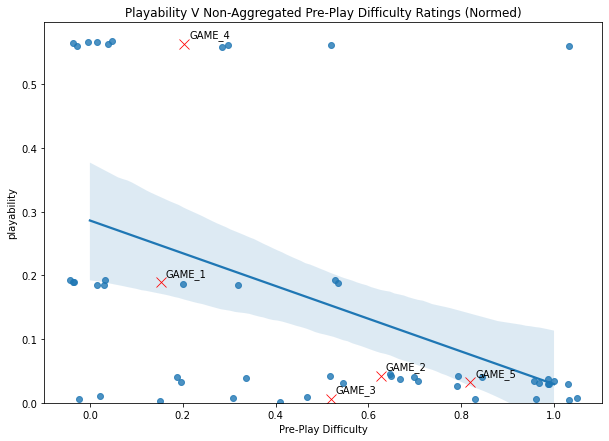

In [85]:
plt.figure(figsize=(10, 7))
sns.regplot(x="setup_list", y="playability", data=exploded_df, x_jitter=0.05, y_jitter=0.005)
plt.title("Playability V Non-Aggregated Pre-Play Difficulty Ratings (Normed)")
plt.xlabel("Pre-Play Difficulty")
plt.ylim(bottom = 0)

sns.scatterplot(x="agg_setup", y="playability", data=diff_df, marker = "x", color = "red", s = 100)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['agg_setup'] + 0.01, point['playability'] + 0.01, str(i))

plt.savefig(fname="../saved_media_important/PlayabilityVPrePlay.png",
            facecolor=f"white", edgecolor='none', dpi=300, bbox_inches='tight')
plt.show()


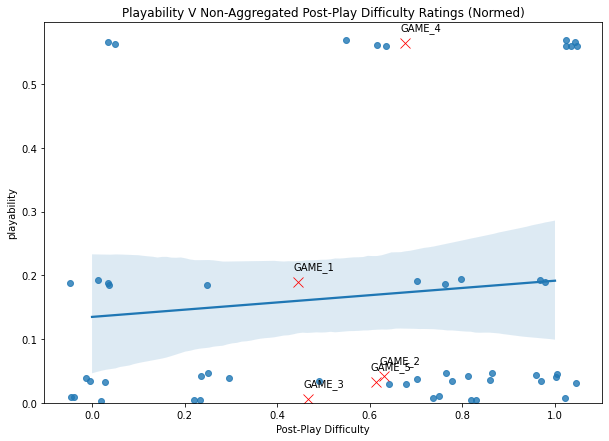

In [84]:
plt.figure(figsize=(10, 7))
sns.regplot(x="play_list", y="playability", data=exploded_df, x_jitter=0.05, y_jitter=0.005)
plt.title("Playability V Non-Aggregated Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Post-Play Difficulty")
plt.ylim(bottom = 0)

sns.scatterplot(x="agg_play", y="playability", data=diff_df, marker = "x", color = "red", s = 100, x_jitter=0.05, y_jitter=0.05)
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['agg_play'] - 0.01, point['playability'] + 0.02, str(i))

plt.savefig(fname="../saved_media_important/PlayabilityVPostPlay.png",
            facecolor=f"white", edgecolor='none', dpi=300, bbox_inches='tight')
plt.show()